In [444]:
import librosa
import math
import librosa.display as display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
import fastaudio.core.signal as fcs
import GetTranscription

In [445]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"

In [446]:
clips =fcs.get_audio_files(lvpath)

In [447]:
clip= clips[450]
audio,sr = librosa.load(clip)
print(clip)
print(GetTranscription.get_file_transcript(clip))
print(audio.shape)
ipd.Audio(audio[:],rate=sr)

E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean\1993\147965\1993-147965-0001.flac
MORNING PRAYERS WERE LONGER THAN USUAL
(59205,)


In [448]:
x = librosa.core.pitch.piptrack(audio)

In [455]:
librosa.zero_crossings(spectral_bandwidth_2).shape

(270,)

In [459]:
librosa.feature.spectral_centroid(audio, sr=sr, hop_length=220)[0].shape

(270,)

In [467]:
x=librosa.pcen(audio,sr=sr,hop_length=220)

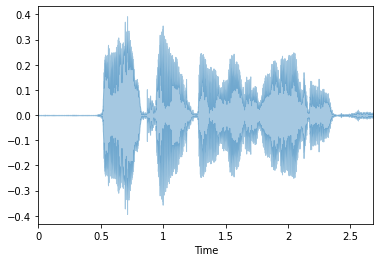

In [490]:
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
rolloff =normalize( librosa.feature.spectral_rolloff(y=y, sr=sr,hop_length=220))
plt.plot(rolloff)

# Approximate minimum frequencies with roll_percent=0.1
#rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, roll_percent=0.1)


#rolloff[0,:]
#plt.plot(sklearn.preprocessing.minmax_scale(x, axis=0), color='r')
#plt.plot(sklearn.preprocessing.minmax_scale(x, axis=0))

In [456]:
def zero_energy(audio):
    energy =normalize(librosa.pcen(audio,sr=sr,hop_length=220))
    #np.nan_to_num(energy, copy=False, nan=0.0, posinf=None, neginf=None)
    zcr = librosa.zero_crossings(energy)
    spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sr, hop_length=220)[0]
    acr = librosa.autocorrelate(spectral_centroids)
    return np.c_[energy,zcr,acr]
    
    

In [457]:
three = zero_energy(audio)

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 59205 and the array at index 2 has size 270

In [346]:
sr

22050

In [334]:
print("mean ",np.mean(audio))
print("median ", np.median(audio))

mean  -4.4373057e-05
median  0.00014267548


1.0


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


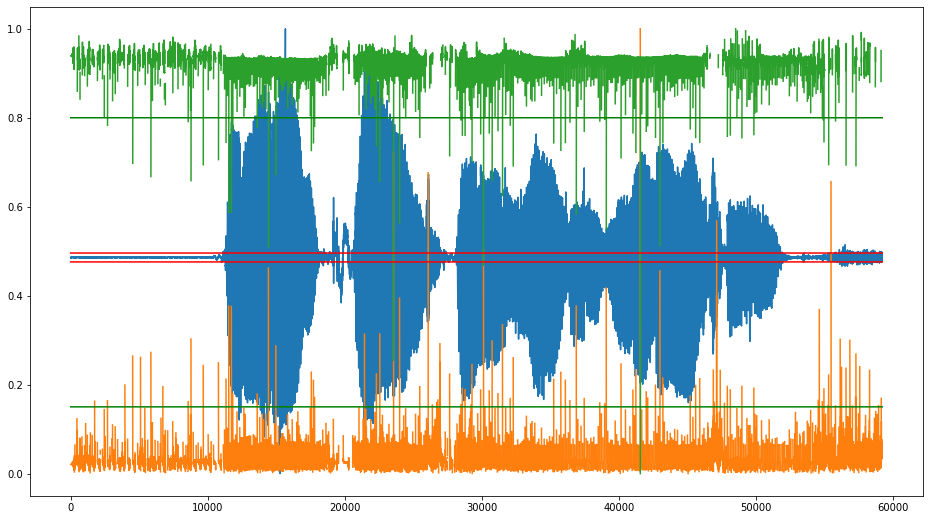

In [353]:
plt.figure(figsize=(16,9))
scaled_audio= (sklearn.preprocessing.minmax_scale(audio, axis=0))
audio_range =  np.max(scaled_audio)- np.min(scaled_audio)
mean =np.mean(scaled_audio)
print(audio_range)
y = np.full(len(audio),mean-audio_range*0.01) #audio non silence min
y1 = np.full(len(audio),mean+audio_range*0.01) #audio non silence max
y2 = np.full(len(audio),0.8)
y3 = np.full(len(audio),0.15)
energy = librosa.pcen(audio)
delta_energy = librosa.feature.delta(energy)
delta_energy2 = librosa.feature.delta(delta_energy)

plt.plot(sklearn.preprocessing.minmax_scale(audio, axis=0)) # blue
plt.plot(sklearn.preprocessing.minmax_scale(energy, axis=0)) #yellow
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy, axis=0)) #green
plt.plot(y,c='r')
plt.plot(y1,c='r')
plt.plot(y2,c='g')
plt.plot(y3,c='g')
#plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))




In [371]:
def split_by_energy(audio):
    frames = len(audio)
    energy = librosa.pcen(audio)
    delta_energy = librosa.feature.delta(energy)
    delta_energy2 = librosa.feature.delta(delta_energy)
    
    
    s_audio= sklearn.preprocessing.minmax_scale(audio, axis=0)
    s_energy = sklearn.preprocessing.minmax_scale(energy, axis=0)
    s_d_energy = sklearn.preprocessing.minmax_scale(delta_energy, axis=0)
    s_d_2_energy = sklearn.preprocessing.minmax_scale(delta_energy2, axis=0)
        
    audio_range =  np.max(s_audio)- np.min(s_audio)
    print(audio_range)
    mean =np.mean(scaled_audio)
    
    #print("scaled delta energy less than 0.5 ", np.count_nonzero( s_d_energy<0.8))
    #print("scaled audio less than 0.5 ", np.count_nonzero(0.45 >s_audio or s_audio> 0.55))
    
    out = []
    #blue audio
    #yellow energy
    #green de1
    #red de2
    for x in range(frames):
        if s_audio[x] > (mean+0.01) or s_audio[x]< (mean-0.01):
            if s_d_energy[x] < 0.8:
                out.append(x)
    return out

In [482]:
splits = split_by_energy(audio)
print(len(splits))

print(splits)

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


1.0
53
[11336, 11531, 11726, 11827, 13608, 14428, 14971, 17557, 17714, 17794, 22305, 22552, 23554, 23995, 25468, 28469, 28571, 28772, 29207, 29277, 29907, 30117, 30534, 30745, 31173, 31500, 32065, 32285, 35237, 35758, 36088, 36422, 36883, 37464, 38599, 38954, 39070, 40148, 41016, 41230, 41553, 41986, 42096, 42661, 42985, 43200, 45194, 45590, 45891, 47903, 48119, 48964, 49837]


In [268]:
ipd.Audio(audio[6794:7296],rate=sr)

(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([-5.35814311e+00,  2.67947767e+03,  5.36431349e+03,  8.04914930e+03,
         1.07339851e+04,  1.34188209e+04,  1.61036567e+04,  1.87884926e+04,
         2.14733284e+04,  2.41581642e+04,  2.68430000e+04]),
 <a list of 2 BarContainer objects>)

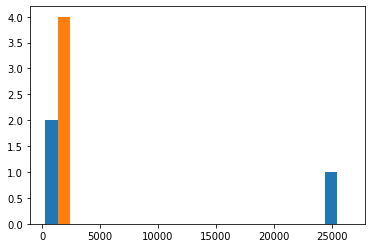

In [186]:
scaled_delta = delta_energy #sklearn.preprocessing.minmax_scale(audio, axis=0)
s_d_avgv = sum(scaled_delta)/len(scaled_delta)
np.nan_to_num(scaled_delta, copy=False, nan=0.0, posinf=None, neginf=None)
hist =np.histogram(scaled_delta,bins=3)
plt.hist(hist)

In [187]:
hist

(array([    2,     5, 26843], dtype=int64),
 array([-5.35814311, -3.4553489 , -1.5525547 ,  0.35023951]))

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


1.0


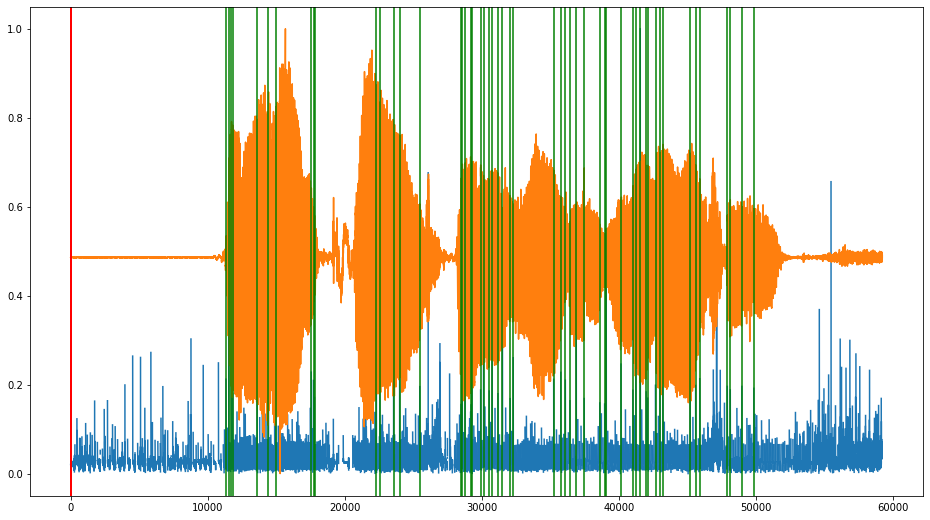

In [500]:
plt.figure(figsize=(16,9))
#plt.plot(audio) #-0.4-0.6
plt.plot(normalize(energy))
plt.plot(normalize(audio))
energy = librosa.pcen(audio)
for x in split_by_energy(audio):
    plt.axvline(x=x,ymin= -1,ymax= 1, label=str(x), c='g')
for x in energy:
    if math.sqrt(x**2)<0.02:
        plt.axvline(x=x,ymin= -1,ymax= 1, label=str(x), c='r')
plt.show()

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


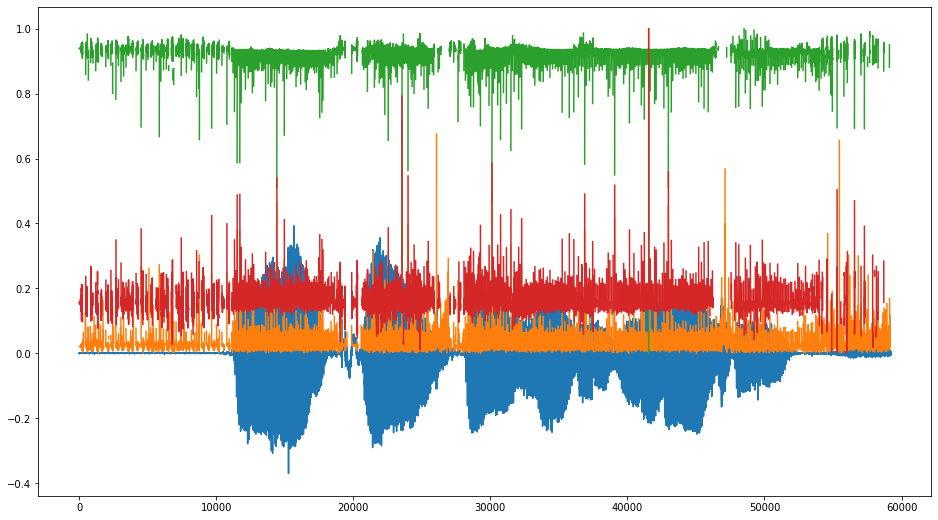

[0.02048679 0.02048644 0.02048687 ...        nan        nan        nan]
[0.93915974 0.93915974 0.93915974 ...        nan        nan        nan]


In [477]:
energy = normalize(librosa.pcen(audio))
delta_energy = normalize(librosa.feature.delta(energy))
delta_energy2 =normalize(librosa.feature.delta(delta_energy))

plt.figure(figsize=(16,9))
plt.plot(audio[:]) #-0.4-0.6
plt.plot(energy) #-0.4-0.6
plt.plot(delta_energy[:]) #0- -30
plt.plot(delta_energy2[:]) #0-2 
plt.show()

print(energy)
print (delta_energy)
#print (min(energy))

In [124]:
print(three)
three.shape

[[2.11755226e-03 1.00000000e+00 1.03005090e+03]
 [1.96022226e-03 0.00000000e+00 1.00825085e+03]
 [1.53129366e-03 0.00000000e+00 9.78578750e+02]
 ...
 [2.98267415e+00 0.00000000e+00 5.07721233e-05]
 [1.68498892e+00 0.00000000e+00 2.41949903e-05]
 [0.00000000e+00 0.00000000e+00 1.41311700e-14]]


(128111, 3)

In [439]:
EM = GaussianMixture(n_components=3)
counter = 0 
for x in clips[0:200]:
    print (counter , x)
    clip,sr= librosa.load(x)
    s = zero_energy(clip)
    EM.fit(s)   
    counter +=1

0 E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean\1272\128104\1272-128104-0000.flac


TypeError: zero_crossings() got an unexpected keyword argument 'hop_length'

In [211]:
x= EM.predict(three)

In [376]:


import entropy as ent

ent.spectral_entropy(audio, sf, method='fft')

AttributeError: module 'entropy' has no attribute 'spectral_entropy'

<module 'entropy' from 'C:\\Users\\nerdi\\.conda\\envs\\pyAudio\\lib\\site-packages\\entropy\\__init__.py'>

In [198]:
type(energy)
np.nan_to_num(energy, copy=False, nan=0.0, posinf=None, neginf=None)

array([-5.69866796e-05, -4.22817563e-05, -4.82142239e-05, ...,
        4.19698363e-01, -1.42411349e-01,  0.00000000e+00])

scaled delta energy less than 0.5  33


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


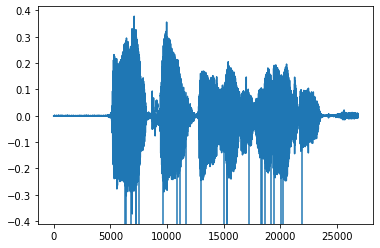

In [278]:
plt.plot(audio)
for x in split_by_energy(audio):
    plt.axvline(x=x, ymin=-0.4, ymax=0.6)

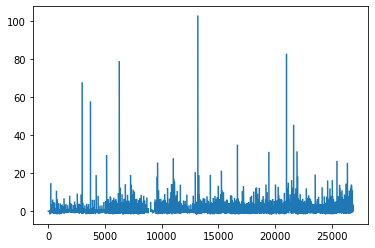

In [156]:
plt.plot(energy)
plt.show()

(1025, 6)


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1115
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases la

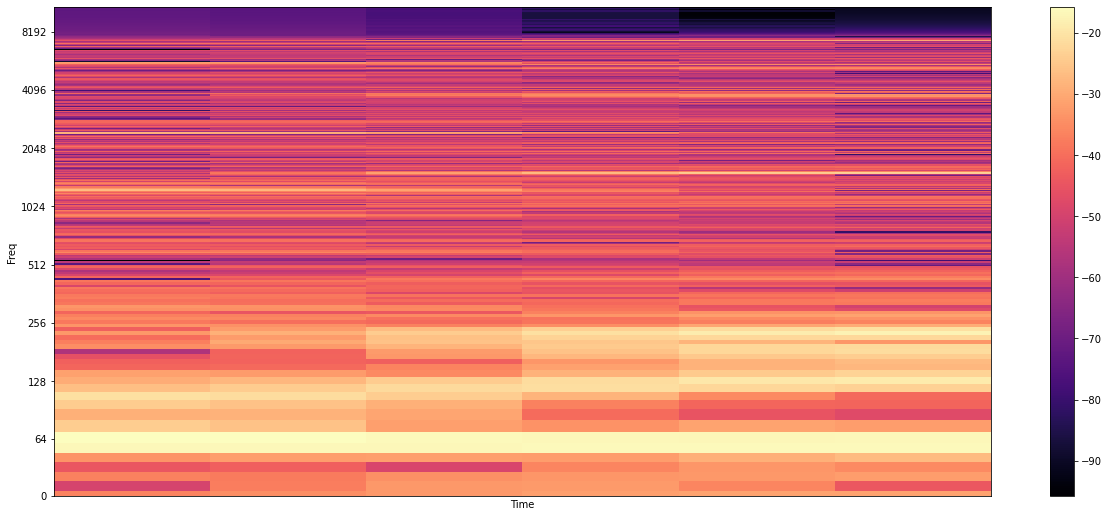

In [480]:
stft = librosa.stft(audio[5145:6260], hop_length=220)
print(stft.shape)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram

plt.figure(figsize=(21,9))
librosa.display.specshow(log_spectogram, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()

In [154]:
from hmmlearn import hmm

In [155]:
hmm.GaussianHMM.

hmmlearn.hmm.GaussianHMM

In [399]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [427]:
spectral_centroids.shape

(270,)

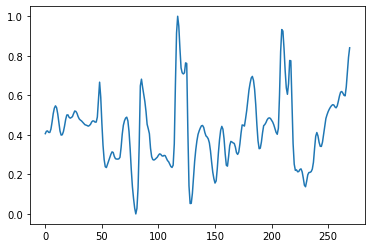

In [417]:
plt.plot(normalize(spectral_bandwidth_2))

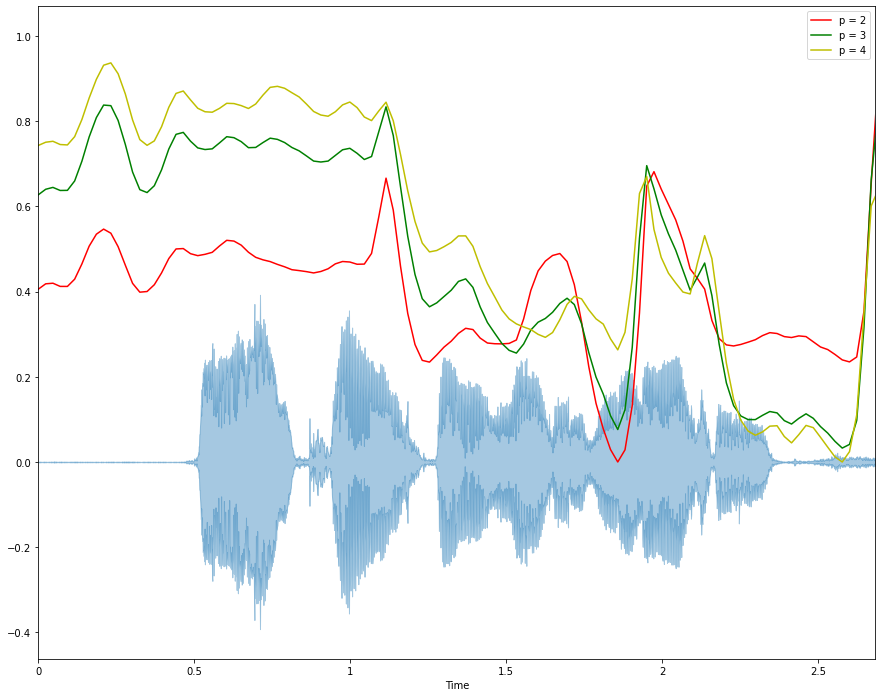

In [429]:
x = audio 
spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sr, hop_length=220)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, hop_length=220)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3,  hop_length=220)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4,  hop_length=220)[0]
#spectral_bandwidth_5 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=5, hop_length=220)[0]
#spectral_bandwidth_6 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=6, hop_length=220)[0]
plt.figure(figsize=(15, 12))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
#plt.plot(t, normalize(spectral_bandwidth_5), color='b')
#plt.plot(t, normalize(spectral_bandwidth_6), color='pink')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [434]:
librosa.autocorrelate(spectral_bandwidth)

NameError: name 'spectral_bandwidth' is not defined

In [41]:
from joblib import dump, load

In [42]:
dump(EM, 'silenceVoiceClusterEM.joblib') 

['silenceVoiceClusterEM.joblib']

In [468]:
a_file= open("test.txt","w")
np.savetxt(a_file, x)
a_file.close()